## Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [3]:
churn_data = pd.read_csv(r"C:\Users\bhara\Downloads\churn_dataset.csv", index_col=0,skipinitialspace=True)

In [3]:
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [5]:
churn_data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
churn_data.dropna(inplace=True)

In [7]:
churn_data.duplicated().sum()

22

In [8]:
churn_data.shape

(7032, 20)

**Input Features:** `gender`, `SeniorCitizen`, `Partner`, `Dependents`, `tenure`, `PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `Contract`, `PaperlessBilling`, `PaymentMethod`, `MonthlyCharges`, `TotalCharges`

**Target:** `Churn`

**ML Task:** Classification

**Evaluation Metric:** `F1-Score`

## Data Cleaning and EDA

In [9]:
churn_cat_data = churn_data.select_dtypes(include="object")

In [10]:
churn_cat_data.sample(5)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
customerID,,,,,,,,,,,,,,,,
9019-QVLZD,Female,No,No,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,No,Electronic check,Yes
3633-CDBUW,Male,No,Yes,Yes,No,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,No
8696-JKZNU,Female,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
8100-PNJMH,Male,Yes,Yes,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),No
7153-CHRBV,Female,Yes,Yes,Yes,No,DSL,Yes,No,Yes,Yes,No,No,One year,Yes,Mailed check,No


In [11]:
churn_num_data = churn_data.select_dtypes(exclude="object")

In [12]:
churn_num_data.sample(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
customerID,,,,
2101-RANCD,0,55,73.10,4144.90
2243-FNMMI,0,20,19.40,415.40
5002-GCQFH,0,49,93.85,4733.10
3082-VQXNH,0,3,29.80,94.40
3721-WKIIL,0,27,19.60,561.15


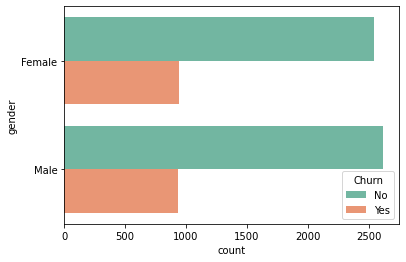

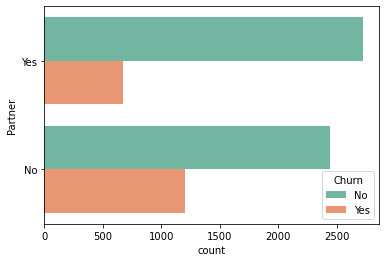

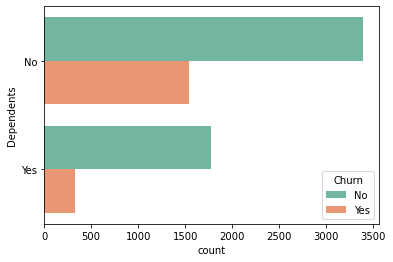

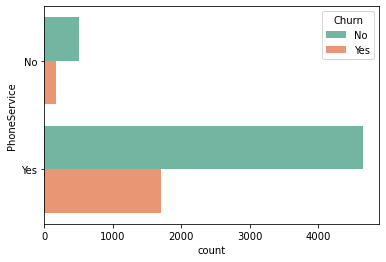

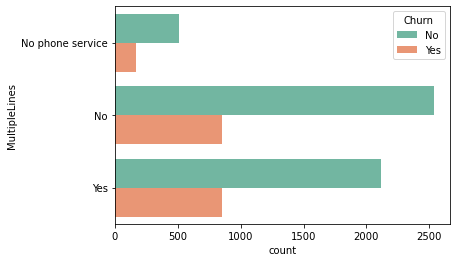

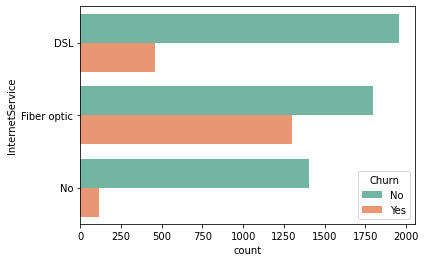

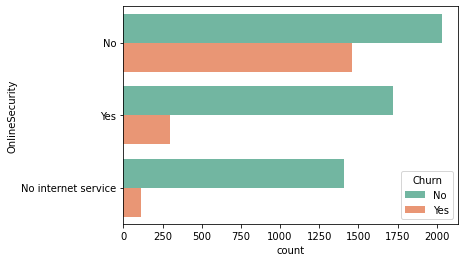

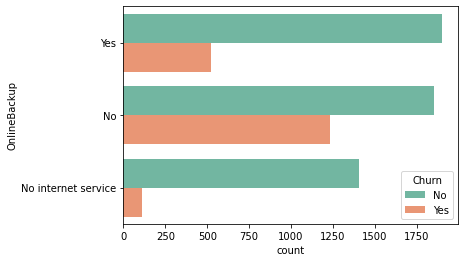

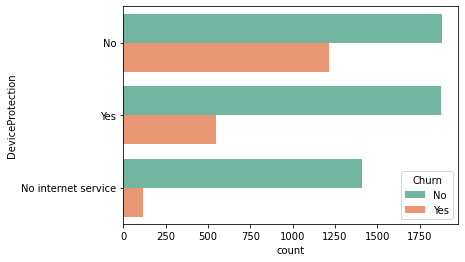

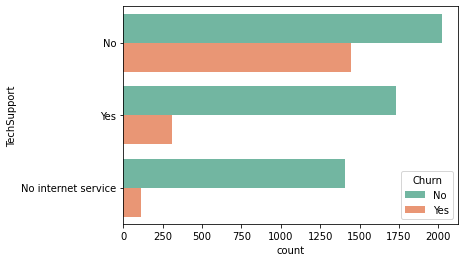

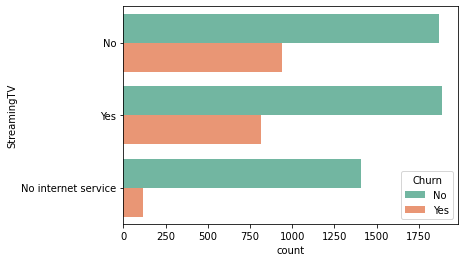

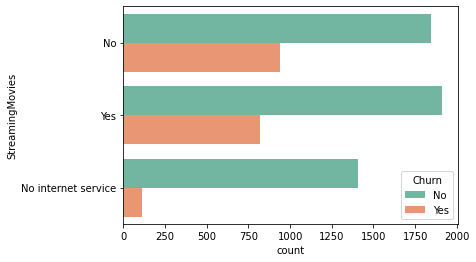

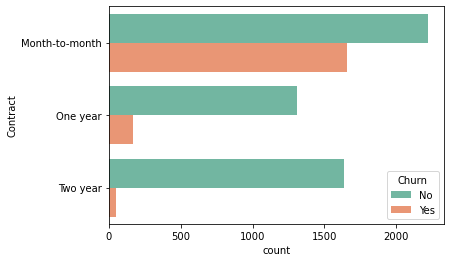

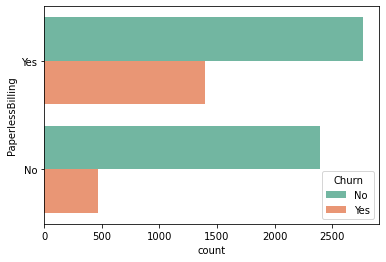

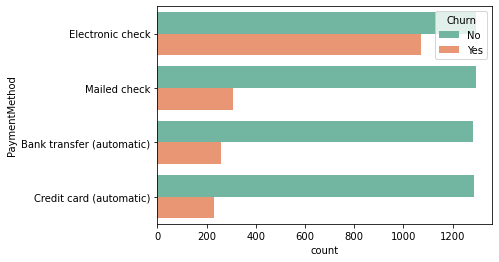

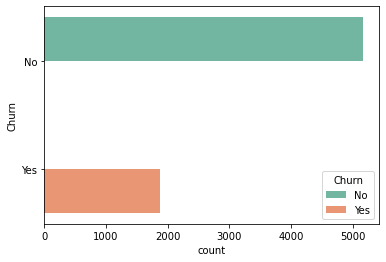

In [13]:
for col in churn_cat_data:
    sns.countplot(data=churn_data,y=col,palette="Set2",hue="Churn")
    plt.show()

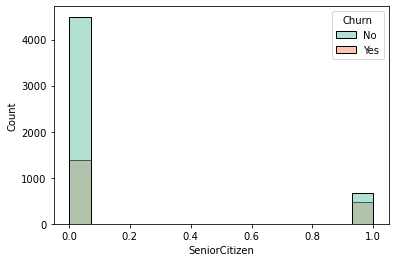

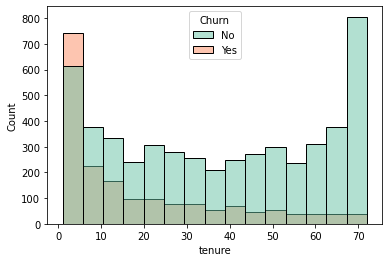

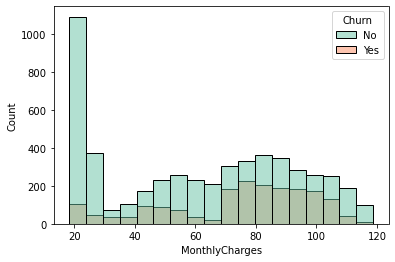

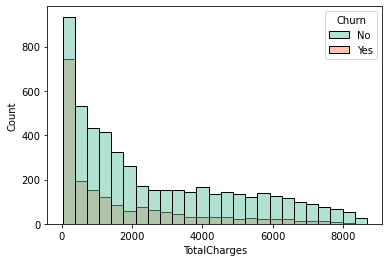

In [14]:
for col in churn_num_data:
    sns.histplot(data=churn_data,x=col,hue="Churn",palette="Set2")
    plt.show()

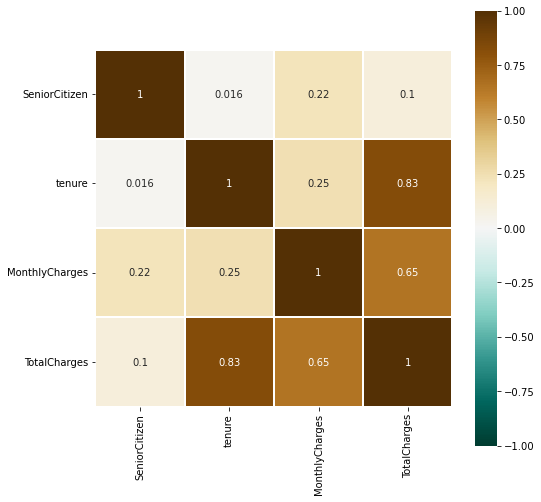

In [15]:
g = sns.heatmap(churn_data.corr(), vmin=-1, vmax=1, annot=True, cmap="BrBG_r", linewidths=0.01, square=True)
g.figure.set_size_inches(8,8)
plt.show()

## Data Preparation

### Identifying input and output

In [4]:
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
X = churn_data.drop("Churn",axis=1)
y = churn_data["Churn"].map({"No": 0, "Yes": 1})

### Train-Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=100,stratify=y)
print("Train size:", X_train.shape, y_train.shape)
print("Test size:", X_test.shape, y_test.shape)

Train size: (5274, 19) (5274,)
Test size: (1758, 19) (1758,)


## Data Preprocessing

### Fit train data

#### Numeric Data

In [19]:
X_train_num = X_train.select_dtypes(exclude="object")
X_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
customerID,,,,
5125-CNDSP,0,63,40.60,2588.95
5438-QMDDL,0,19,59.80,1130.85
4782-OSFXZ,1,71,82.70,5831.20
0822-QGCXA,1,27,83.85,2310.20
9603-OAIHC,1,1,70.05,70.05


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
X_train_num_scaled= scaler.fit_transform(X_train_num.drop("SeniorCitizen", axis=1))

#### Categorical Data

In [22]:
X_train_cat = X_train.select_dtypes(include="object")
X_train_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
customerID,,,,,,,,,,,,,,,
5125-CNDSP,Male,No,Yes,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Bank transfer (automatic)
5438-QMDDL,Female,Yes,No,Yes,No,DSL,No,Yes,No,No,No,Yes,Month-to-month,Yes,Mailed check
4782-OSFXZ,Female,Yes,No,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic)
0822-QGCXA,Female,Yes,No,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,No,Electronic check
9603-OAIHC,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
ohe = OneHotEncoder(sparse=False)
X_train_cat_encoded = ohe.fit_transform(X_train_cat)

In [25]:
X_train_transformed = np.hstack((X_train_num_scaled,X_train_cat_encoded,
                                 X_train_num["SeniorCitizen"].values.reshape(-1,1)))

In [26]:
X_train_transformed.shape

(5274, 45)

### Transform Test Data

#### Numeric Data

In [27]:
X_test_num = X_test.select_dtypes(exclude="object")
X_test_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
customerID,,,,
5884-GCYMI,0,1,69.40,69.40
3704-IEAXF,0,72,53.65,3784.00
8818-DOPVL,1,46,104.45,4863.85
2673-ZALNP,0,7,19.90,173.15
1853-ARAAQ,0,26,50.35,1277.50


In [28]:
X_test_num_scaled = scaler.transform(X_test_num.drop("SeniorCitizen", axis=1))

#### Categorical Data

In [29]:
X_test_cat = X_test.select_dtypes(include="object")
X_test_cat.head(5)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
customerID,,,,,,,,,,,,,,,
5884-GCYMI,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Mailed check
3704-IEAXF,Female,Yes,Yes,No,No phone service,DSL,No,Yes,No,Yes,Yes,Yes,Two year,No,Credit card (automatic)
8818-DOPVL,Female,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2673-ZALNP,Female,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1853-ARAAQ,Female,No,No,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic)


In [30]:
X_test_cat_encoded = ohe.transform(X_test_cat)

In [31]:
X_test_transformed = np.hstack((X_test_num_scaled, X_test_cat_encoded,
                               X_test_num["SeniorCitizen"].values.reshape(-1,1)))

In [32]:
X_test_transformed.shape

(1758, 45)

## Modeling

In [33]:
from sklearn import metrics

In [34]:
models = pd.DataFrame(columns=["algorithm","metric","train","test"])

In [35]:
metric_funcs = {
    "accuracy": metrics.accuracy_score,
    "precision": metrics.precision_score,
    "recall": metrics.recall_score,
    "f1_score": metrics.f1_score,
    "roc_auc": metrics.roc_auc_score
}

### KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [38]:
y_train_knn_pred = knn_model.predict(X_train_transformed)
y_test_knn_pred = knn_model.predict(X_test_transformed)

In [39]:
for name, func in metric_funcs.items():
    models = models.append({
        "algorithm": "knn",
        "metric": name,
        "train": func(y_train, y_train_knn_pred),
        "test": func(y_test, y_test_knn_pred)
    }, ignore_index=True)

In [40]:
y_test.value_counts()

0    1291
1     467
Name: Churn, dtype: int64

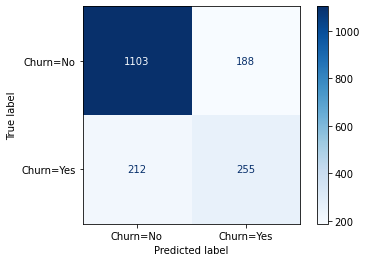

In [41]:
cm = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, y_test_knn_pred),
                                    display_labels=["Churn=No", "Churn=Yes"])
cm.plot(cmap="Blues")
plt.show()

In [42]:
print(metrics.classification_report(y_test, y_test_knn_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1291
           1       0.58      0.55      0.56       467

    accuracy                           0.77      1758
   macro avg       0.71      0.70      0.70      1758
weighted avg       0.77      0.77      0.77      1758



### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
lr_model = LogisticRegression(max_iter=500, class_weight="balanced")
lr_model.fit(X_train_transformed, y_train)

LogisticRegression(class_weight='balanced', max_iter=500)

In [45]:
y_train_lr_pred = lr_model.predict(X_train_transformed)
y_test_lr_pred = lr_model.predict(X_test_transformed)

In [46]:
for name, func in metric_funcs.items():
    models = models.append({
        "algorithm": "lr",
        "metric": name,
        "train": func(y_train, y_train_lr_pred),
        "test": func(y_test, y_test_lr_pred)
    }, ignore_index=True)

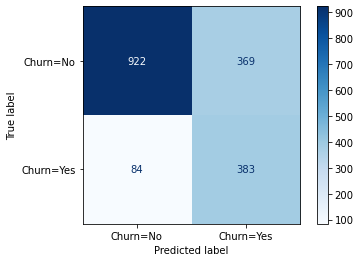

In [47]:
cm = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, y_test_lr_pred),
                                    display_labels=["Churn=No", "Churn=Yes"])
cm.plot(cmap="Blues")
plt.show()

In [48]:
print(metrics.classification_report(y_test, y_test_lr_pred))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1291
           1       0.51      0.82      0.63       467

    accuracy                           0.74      1758
   macro avg       0.71      0.77      0.72      1758
weighted avg       0.81      0.74      0.76      1758



### SVM

In [49]:
from sklearn.svm import SVC

In [50]:
svc_model = SVC(probability=True, class_weight="balanced")
svc_model.fit(X_train_transformed, y_train)

SVC(class_weight='balanced', probability=True)

In [51]:
y_train_svc_pred = svc_model.predict(X_train_transformed)
y_test_svc_pred = svc_model.predict(X_test_transformed)

In [52]:
for name, func in metric_funcs.items():
    models = models.append({
        "algorithm": "svm",
        "metric": name,
        "train": func(y_train, y_train_svc_pred),
        "test": func(y_test, y_test_svc_pred)
    }, ignore_index=True)

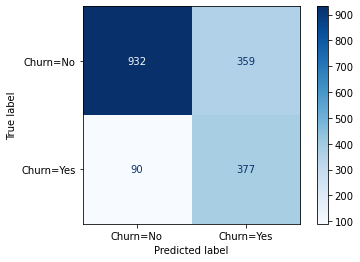

In [53]:
cm = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, y_test_svc_pred),
                                    display_labels=["Churn=No", "Churn=Yes"])
cm.plot(cmap="Blues")
plt.show()

In [54]:
print(metrics.classification_report(y_test, y_test_svc_pred))

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1291
           1       0.51      0.81      0.63       467

    accuracy                           0.74      1758
   macro avg       0.71      0.76      0.72      1758
weighted avg       0.81      0.74      0.76      1758



## Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dt_model = DecisionTreeClassifier(class_weight="balanced")
dt_model.fit(X_train_transformed, y_train)

DecisionTreeClassifier(class_weight='balanced')

In [57]:
y_train_dt_pred = dt_model.predict(X_train_transformed)
y_test_dt_pred = dt_model.predict(X_test_transformed)

In [58]:
for name, func in metric_funcs.items():
    models = models.append({
        "algorithm": "dt",
        "metric": name,
        "train": func(y_train, y_train_dt_pred),
        "test": func(y_test, y_test_dt_pred)
    }, ignore_index=True)

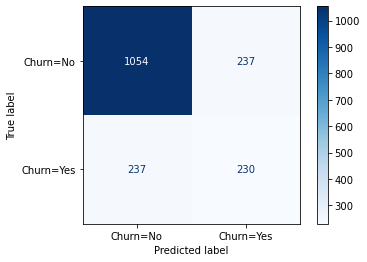

In [59]:
cm = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, y_test_dt_pred),
                                    display_labels=["Churn=No", "Churn=Yes"])
cm.plot(cmap="Blues")
plt.show()

In [60]:
print(metrics.classification_report(y_test, y_test_dt_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1291
           1       0.49      0.49      0.49       467

    accuracy                           0.73      1758
   macro avg       0.65      0.65      0.65      1758
weighted avg       0.73      0.73      0.73      1758



## Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rf_model = RandomForestClassifier(class_weight="balanced")
rf_model.fit(X_train_transformed, y_train)

RandomForestClassifier(class_weight='balanced')

In [63]:
y_train_rf_pred = rf_model.predict(X_train_transformed)
y_test_rf_pred = rf_model.predict(X_test_transformed)

In [64]:
for name, func in metric_funcs.items():
    models = models.append({
        "algorithm": "rf",
        "metric": name,
        "train": func(y_train, y_train_rf_pred),
        "test": func(y_test, y_test_rf_pred)
    }, ignore_index=True)

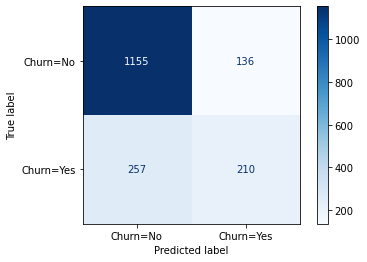

In [65]:
cm = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, y_test_rf_pred),
                                    display_labels=["Churn=No", "Churn=Yes"])
cm.plot(cmap="Blues")
plt.show()

In [66]:
print(metrics.classification_report(y_test, y_test_rf_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1291
           1       0.61      0.45      0.52       467

    accuracy                           0.78      1758
   macro avg       0.71      0.67      0.69      1758
weighted avg       0.76      0.78      0.76      1758



## Model Comparision

In [67]:
models.pivot_table(index="algorithm", columns="metric", values="test")

metric,accuracy,f1_score,precision,recall,roc_auc
algorithm,,,,,
dt,0.730375,0.492505,0.492505,0.492505,0.654463
knn,0.772469,0.560440,0.575621,0.546039,0.700207
lr,0.742321,0.628384,0.509309,0.820128,0.767152
rf,0.776451,0.516605,0.606936,0.449679,0.672167
svm,0.744596,0.626766,0.512228,0.807281,0.764601


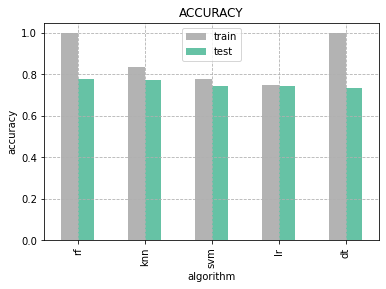

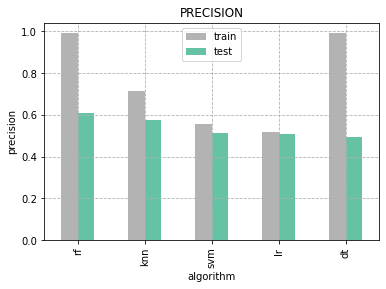

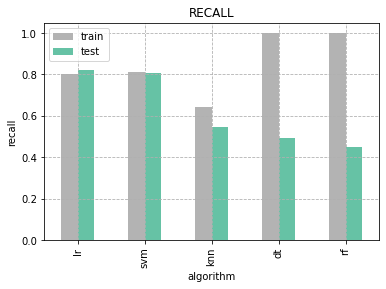

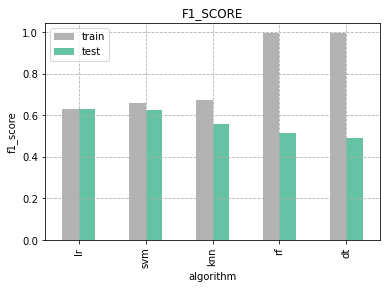

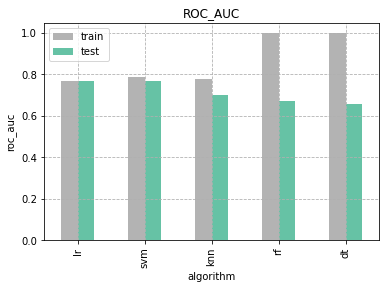

In [68]:
for m in metric_funcs:
    df = models.loc[models.metric==m]
    df = df.set_index("algorithm").drop("metric", axis=1).sort_values(by="test", ascending=False)
    
    df.plot(kind="bar", colormap="Set2_r")
    plt.grid(linestyle="--")
    plt.ylabel(m)
    plt.title(m.upper())
    plt.show()

**Observations:**
- Dataset is imbalanced. Accuracy will not be a good evaluation metric in this case.
- `F1-Score` and `ROC_AUC` is a better metric for evaluating imbalanced datasets.
- `class_weight="balanced"` is used whereever possible to balance the dataset using weights.
- Based on these two metrics Logistic Regression and SVM algorithms produced highest evaluation scores.
- Decision Tree and Random Forest models are overfit and needs to be tuned.